<a href="https://colab.research.google.com/github/prajwalDU/customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

Importing python packages

In [1]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataset
data = '/content/drive/MyDrive/almabetter/ML/customer segmentation/Online Retail.xlsx'

df = pd.read_excel(data)

In [4]:
# Check first 5 rows of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Check last 5 rows of dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Check the shape of dataset
df.shape

(541909, 8)

In [7]:
# Check the describe of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Check the duplicate values in our dataset

In [8]:
# Check the duplicates in dataset
len(df[df.duplicated()])

5268

We have 5268 duplicates values in our dataset we as to drop it before starting analysis

In [9]:
# Print the shape of dataset before removing duplicate
print('The shape of dataset before removing duplicate :', df.shape)

# Dropping duplicate
df.drop_duplicates(inplace=True)

# Print the shape of dataset after removing duplicate
print('The shape of dataset after removing duplicate :', df.shape)

The shape of dataset before removing duplicate : (541909, 8)
The shape of dataset after removing duplicate : (536641, 8)


Check the missing values in dataset with percentage

In [10]:
# Check the missing values
missing = df.columns[df.isnull().any()].tolist()

# Print the missing values in dataset
print('Missing Data count')
print(df[missing].isnull().sum().sort_index(ascending=False))
# Print the percentage of missing data
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_index(ascending=False)/len(df)*100,2))

Missing Data count
Description      1454
CustomerID     135037
dtype: int64
Missing Data Percentage
Description     0.27
CustomerID     25.16
dtype: float64


Dropping rows where customerID column contain null

In [11]:
# Dropping customerID where row with nulls
df.dropna(subset=['CustomerID'], inplace=True)

In [12]:
# Check shape of dataset
df.shape

(401604, 8)

In [13]:
# Check the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


**Feature Engineering**

AS we seen above we have one datetime column we take new columns from that like date, month, year, hour

In [14]:
df['year'] = df['InvoiceDate'].apply(lambda x : x.year)
df['month'] = df['InvoiceDate'].apply(lambda x : x.month_name())
df['day'] = df['InvoiceDate'].apply(lambda x : x.day_name())
df['hour'] = df['InvoiceDate'].apply(lambda x : x.hour)

creating another one feature total amount

In [15]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

Above we created hour columns for further analysis we divid time into 3 zone morning, afternoon and evening.

In [16]:
df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

In [17]:
# Check cancellation using InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TotalAmount,TimeType
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010,December,Wednesday,9,-27.50,Morning
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010,December,Wednesday,9,-4.65,Morning
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010,December,Wednesday,10,-19.80,Morning
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010,December,Wednesday,10,-6.96,Morning


In [18]:
# Check cancellations shape
cancellations.shape

(8872, 14)

We have total 401604 InvoiceNo in that we have 8872 cancellations data, so we has to drop it

In [19]:
# Drop the rows which contain 'C' in our main dataset
dt = df[~df['InvoiceNo'].str.contains('C')]

In [20]:
# Check our dataset shape
dt.shape

(392732, 14)

# **EDA**

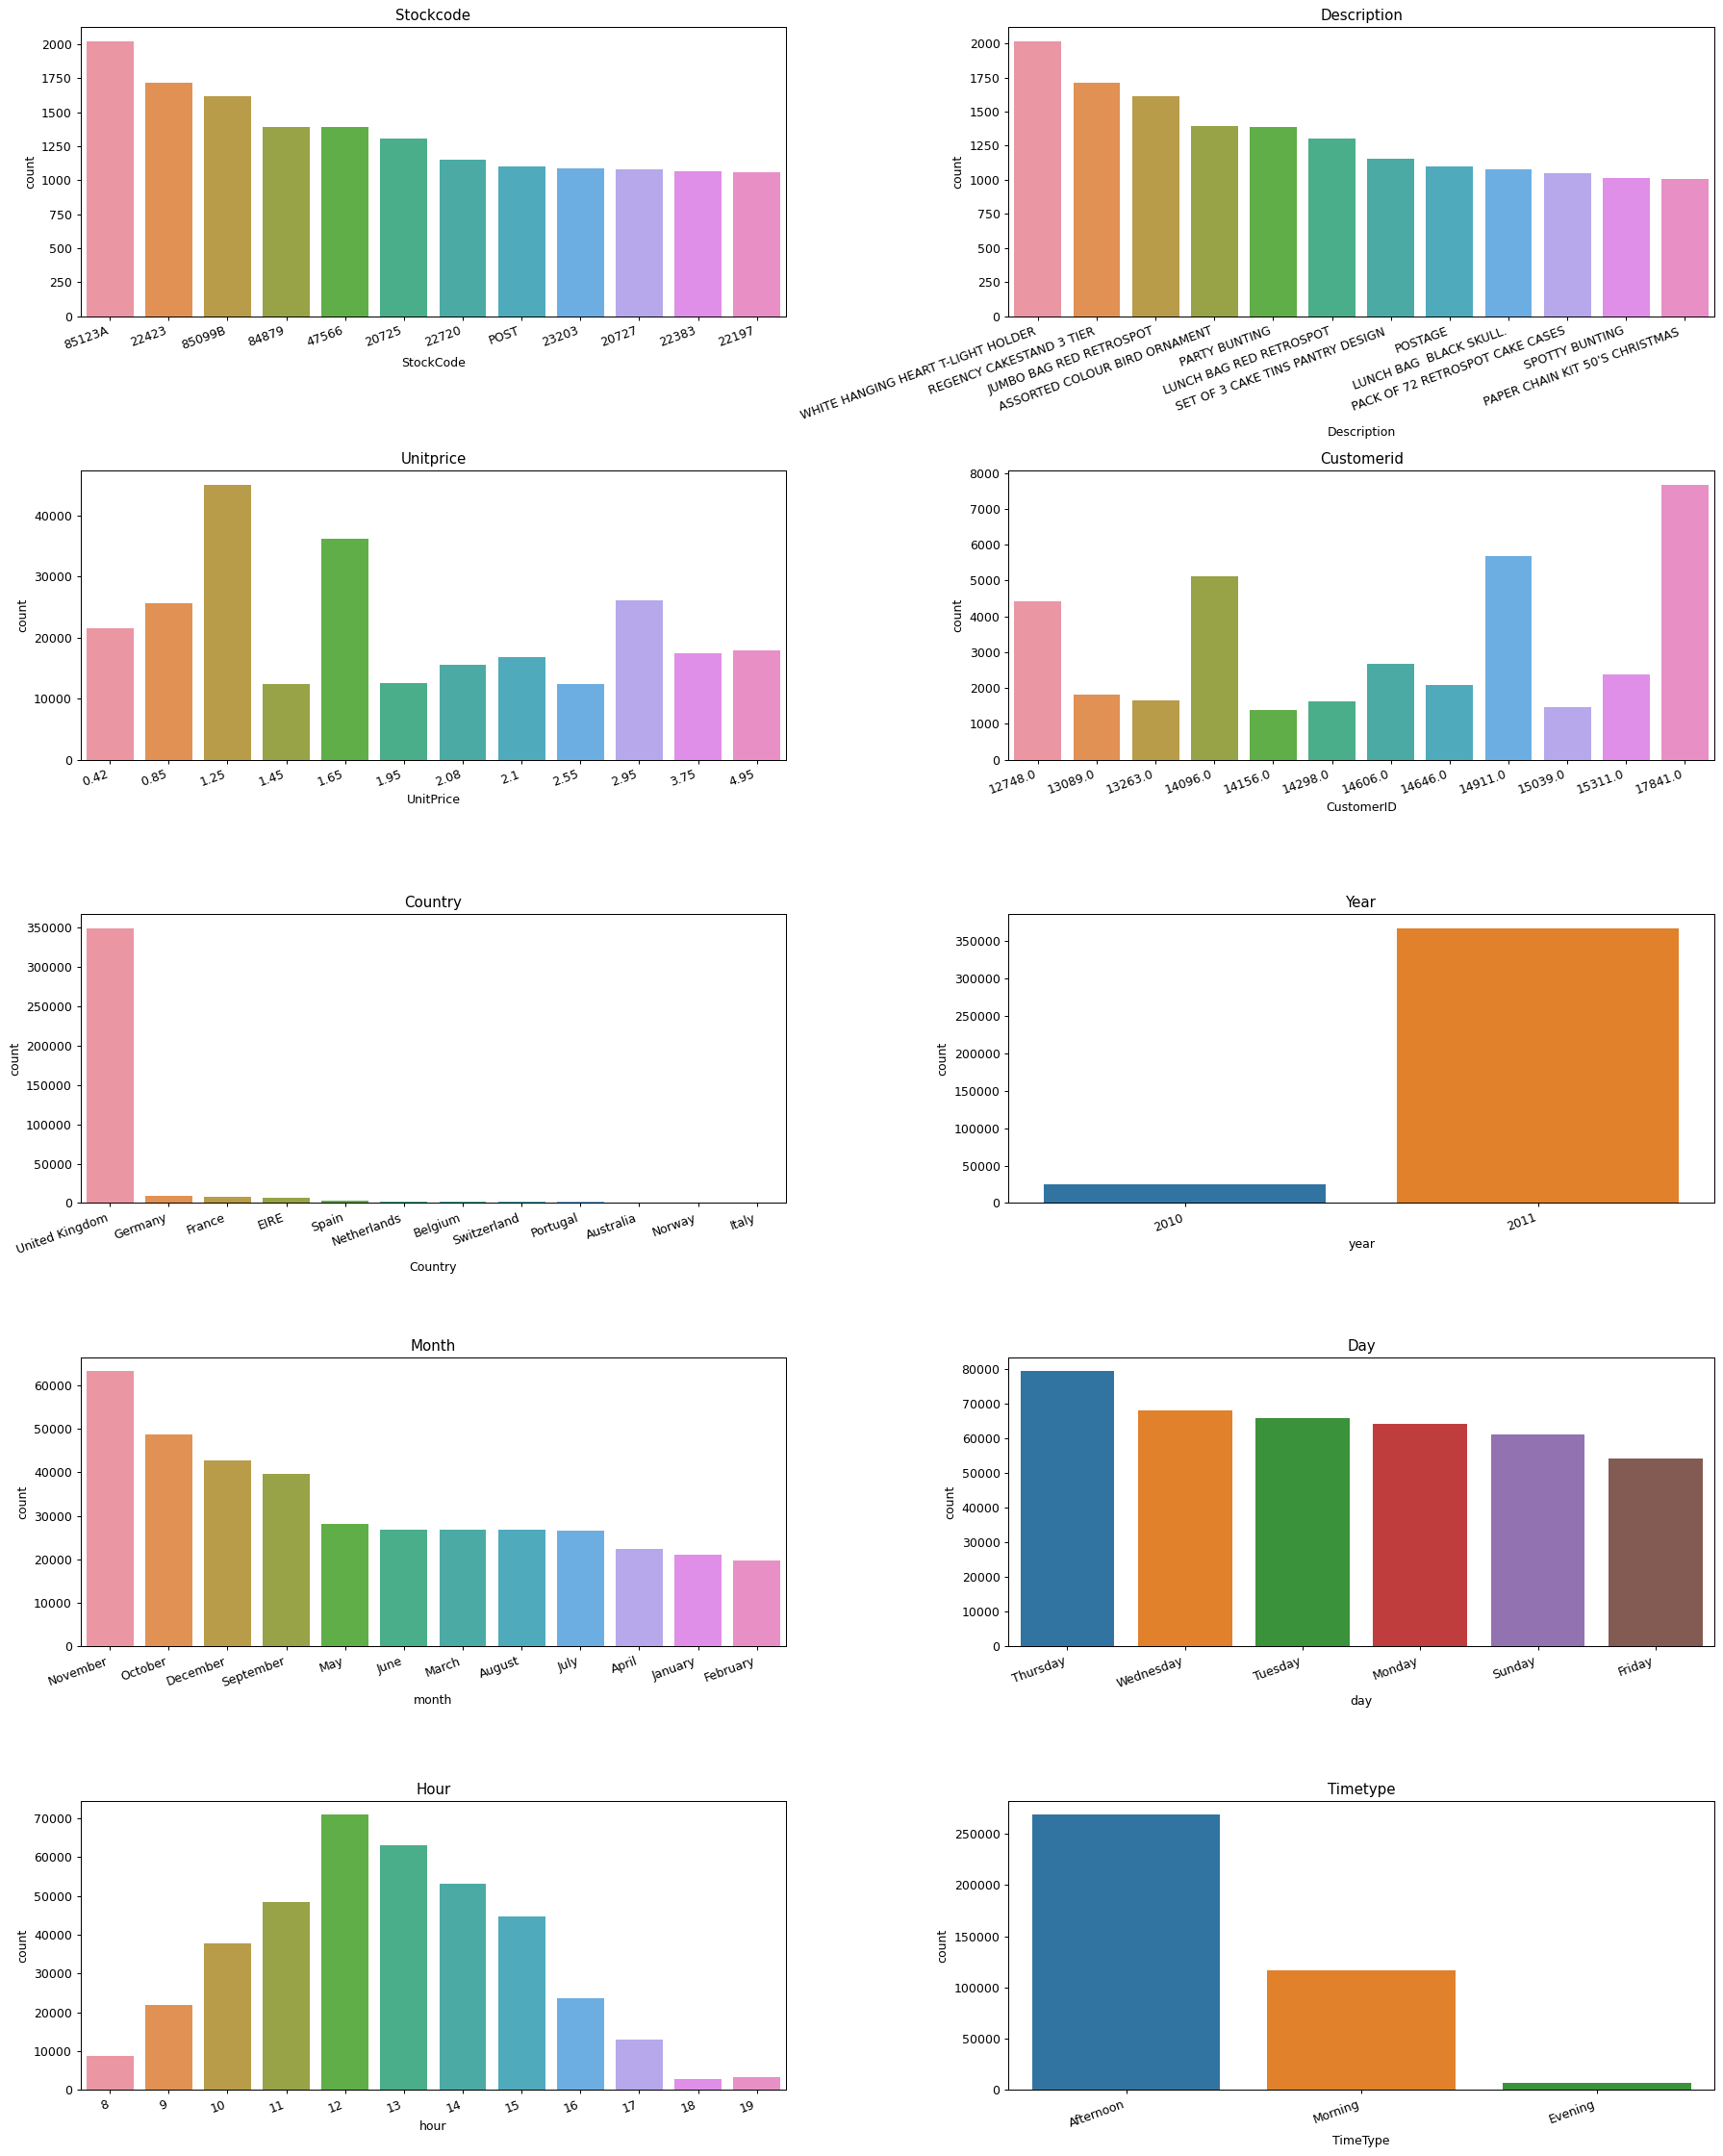

In [21]:
# Ploting top values based on frequency in each column
column = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'month','day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(column):
  plt.subplot(5,2,n+1)
  temp = dt[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index' : col, col:'count'}, inplace=True)
  sns.barplot(x=col, y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20, ha='right')
  plt.tight_layout()

Observations/hypothesis -  

*   WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products,
*   2011 is our high selling year and 2010 is least,
*   Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers.
*   Most of the customers have purchased the gifts in the month of November, October, December and September, Less number of customers have purchased the gifts in the month of April, January and February.
*   Thursday is high selling day according to data and There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
*   Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.





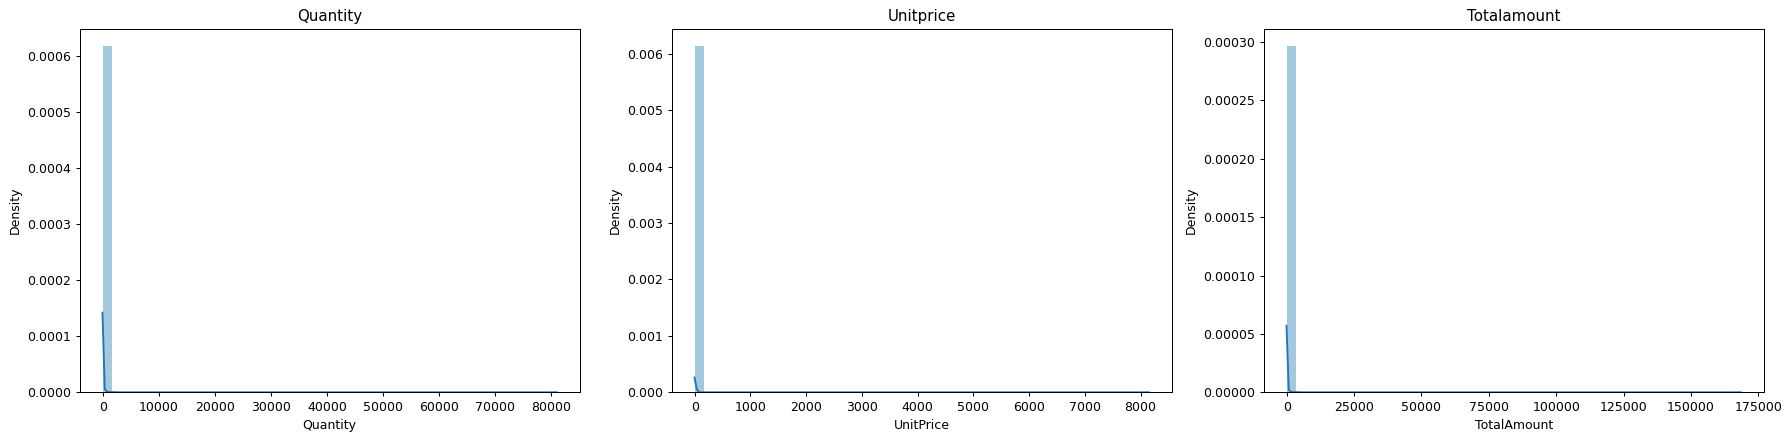

In [22]:
# Visulizing the distribution
column = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(column):
  plt.subplot(1,3,n+1)
  sns.distplot(dt[col])
  plt.title(col.title())
  plt.tight_layout()

Observation:
*   It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode
*   For symmetric graph mean=median=mode


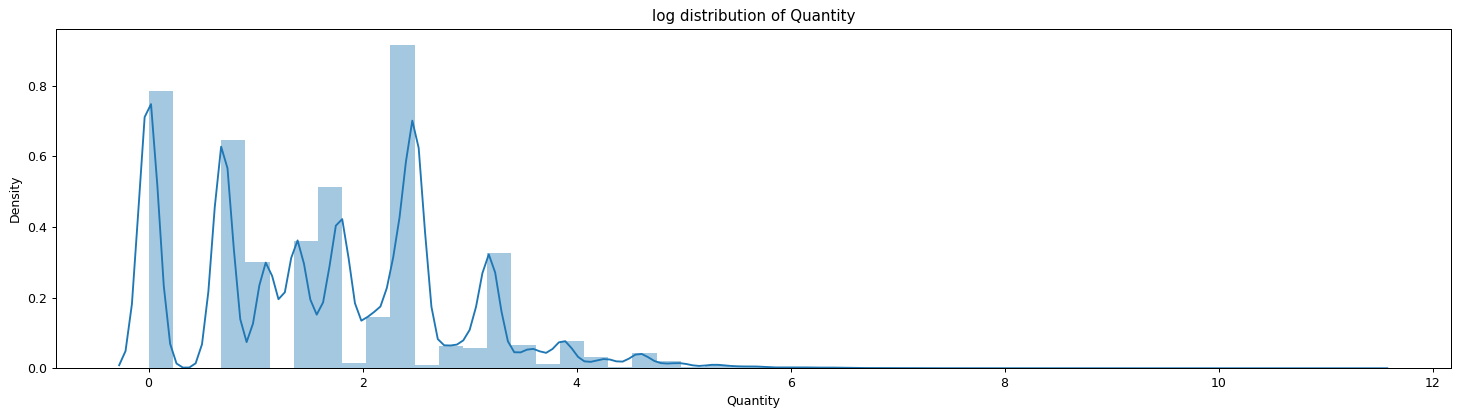

In [23]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(dt['Quantity']))
plt.show()

In [24]:
# Print order placed country
country_invoice = dt.groupby('Country').nunique()['InvoiceNo'].reset_index().sort_values('InvoiceNo', ascending=False)
country_invoice.rename(columns={'InvoiceNo':'Invoice_count'}, inplace=True)
country_invoice.head()

,Country,Invoice_count
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98


United Kingdom is making most of the purchases as compared to other countries

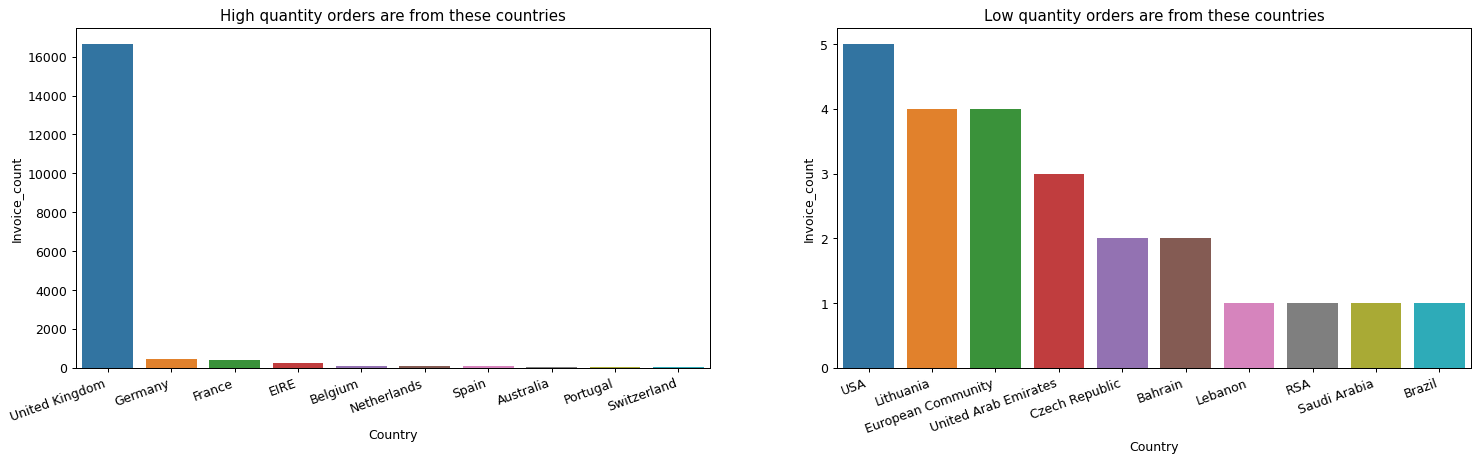

In [25]:
# Visualizing top and bottom 10 countries based on average item purchase
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20, ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_invoice.head(10),x='Country',y='Invoice_count')

plt.subplot(1,2,2)
plt.xticks(rotation=20, ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_invoice.tail(10),x='Country',y='Invoice_count')

In [26]:
# Most customers are from these countries
country_cust = dt.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

,Country,Customer_Count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


United Kingdom has most number of customers

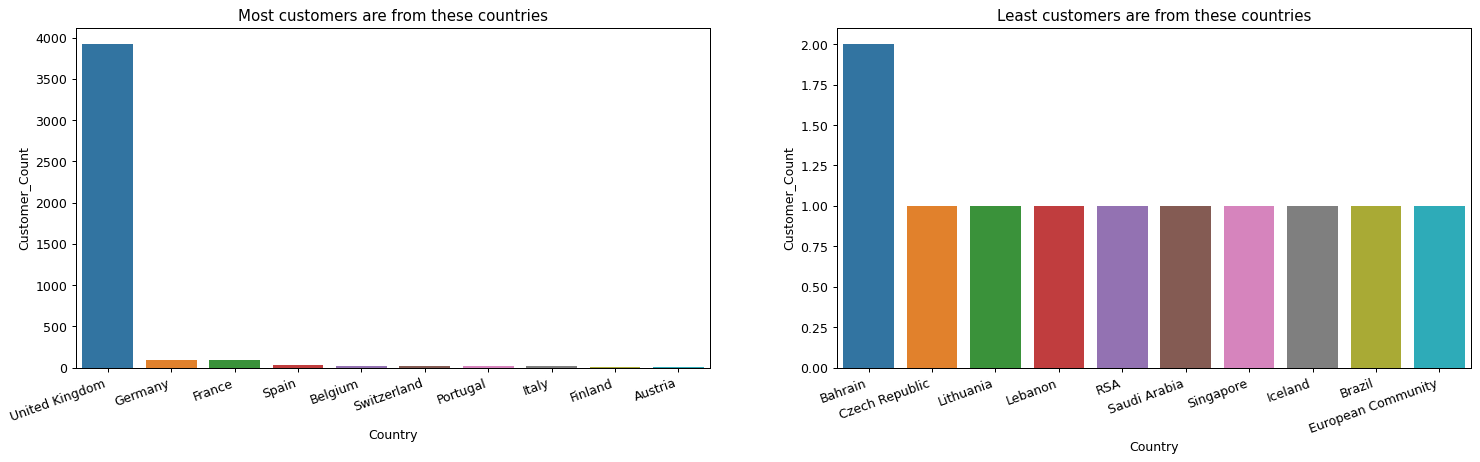

In [27]:
# Visualizing top and bottom 10 countries based on total customers 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [28]:
# Countrywise average item purchases
country_quantity = dt.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

,Country,Average_Quantity
23,Netherlands,85.034702
19,Japan,81.046729
31,Sweden,80.173333
0,Australia,71.114020
8,Czech Republic,26.840000


Orders with mass quantity are placed by the customers from Netherlands

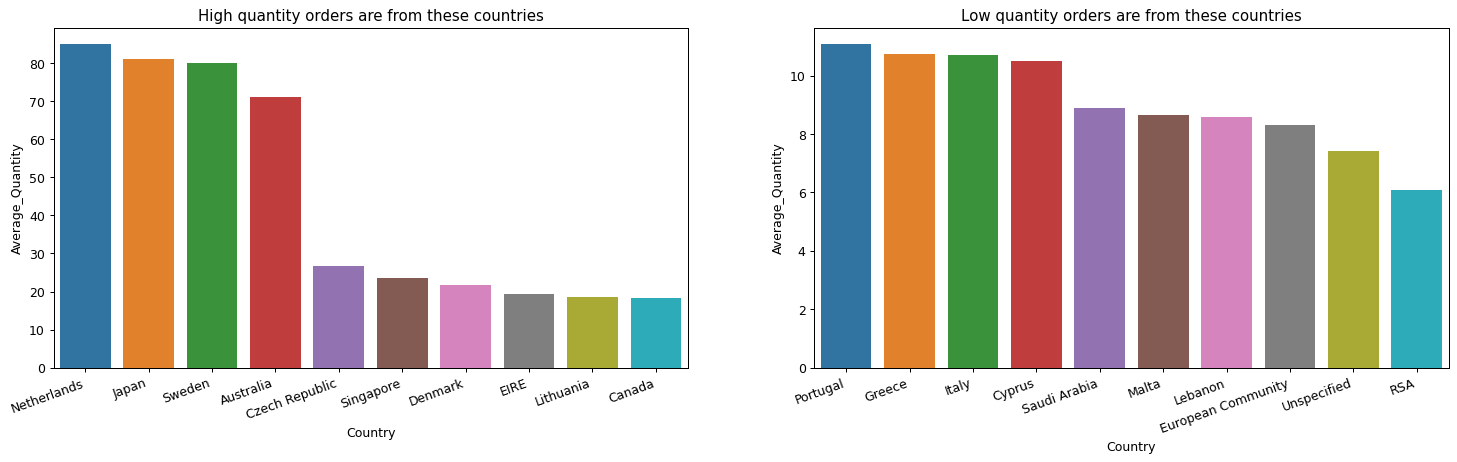

In [29]:
# Visualizing top and bottom 10 countries based on average item purchases 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [30]:
# quantity wise item purchases
product_quantity = dt.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


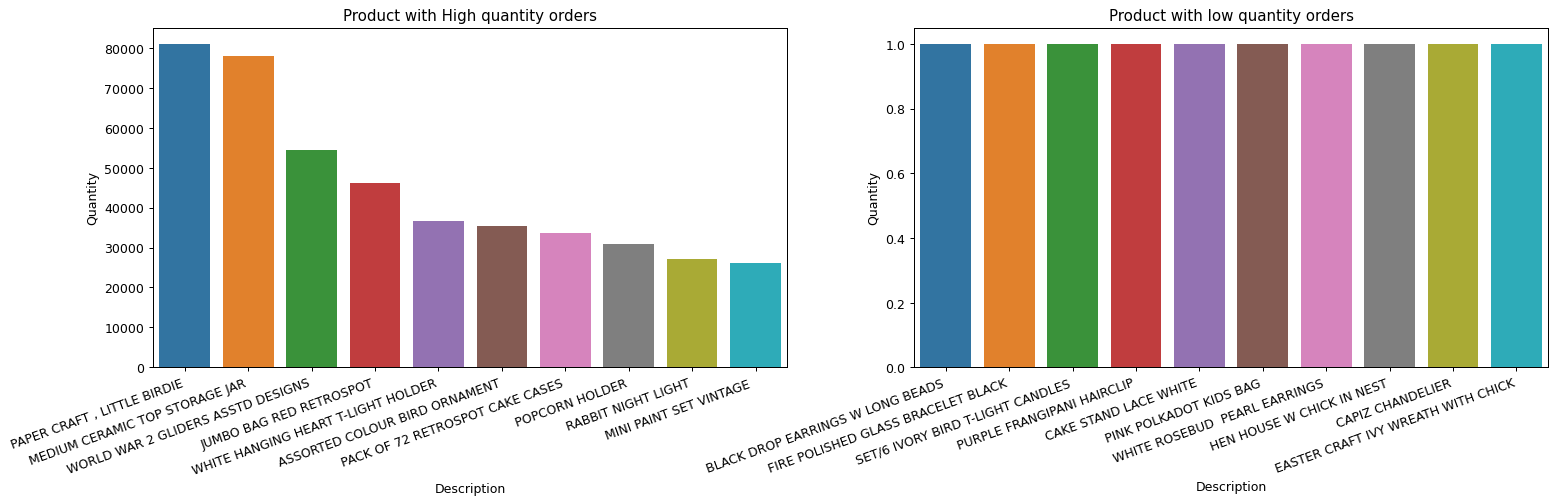

In [31]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [32]:
# Amount wise item purchases
product_price = dt.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

,Description,TotalAmount
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142264.75
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


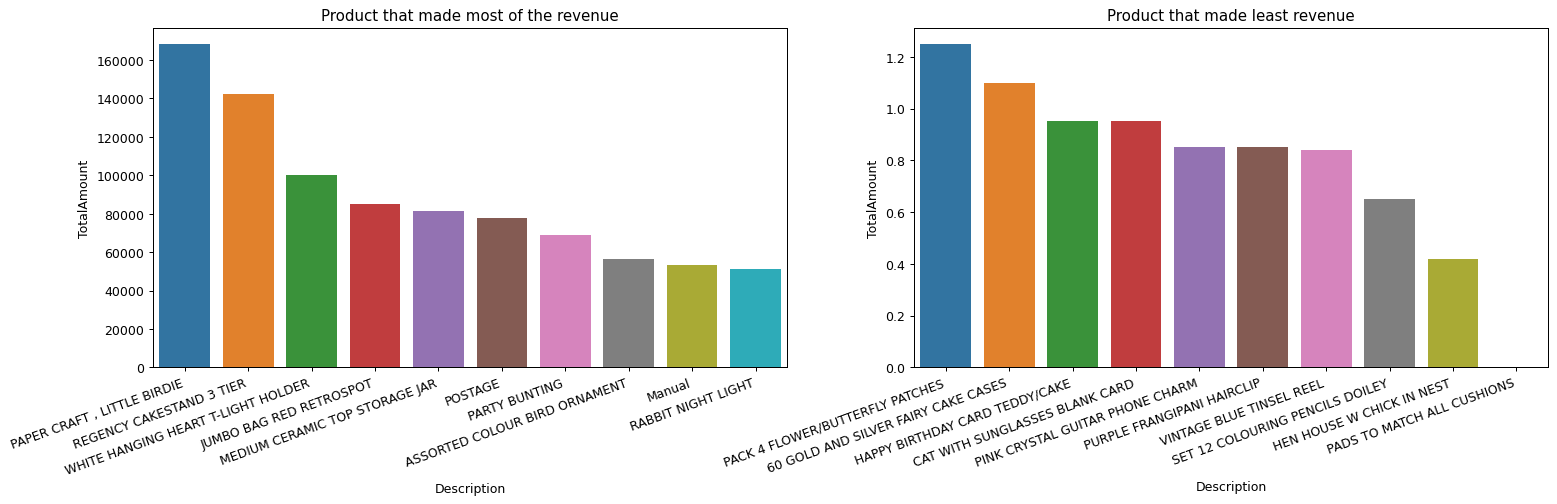

In [33]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [34]:
# customer wise item purchases
product_customer = df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

,Description,Customer_Count
2780,REGENCY CAKESTAND 3 TIER,887
3716,WHITE HANGING HEART T-LIGHT HOLDER,858
2355,PARTY BUNTING,708
217,ASSORTED COLOUR BIRD ORNAMENT,679
3014,SET OF 3 CAKE TINS PANTRY DESIGN,640


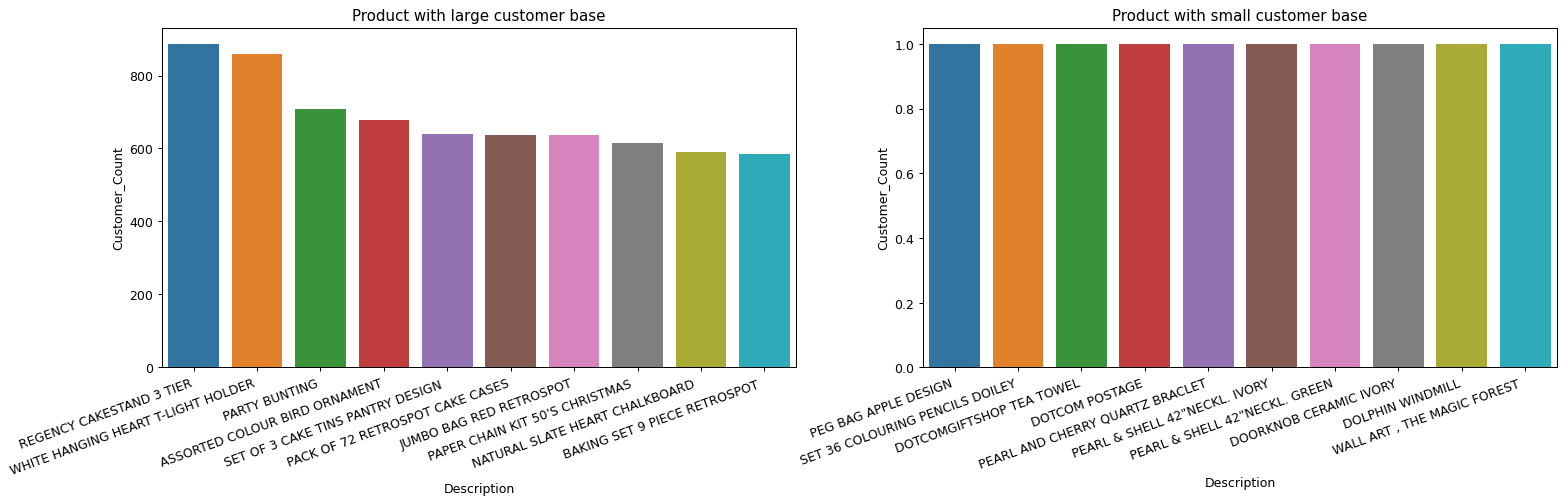

In [35]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [36]:
# Checking the number of cancellations by each customer. 
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

,CustomerID,Cancellations
736,14911.0,226
1485,17841.0,136
1397,17511.0,113
848,15311.0,112
89,12607.0,101


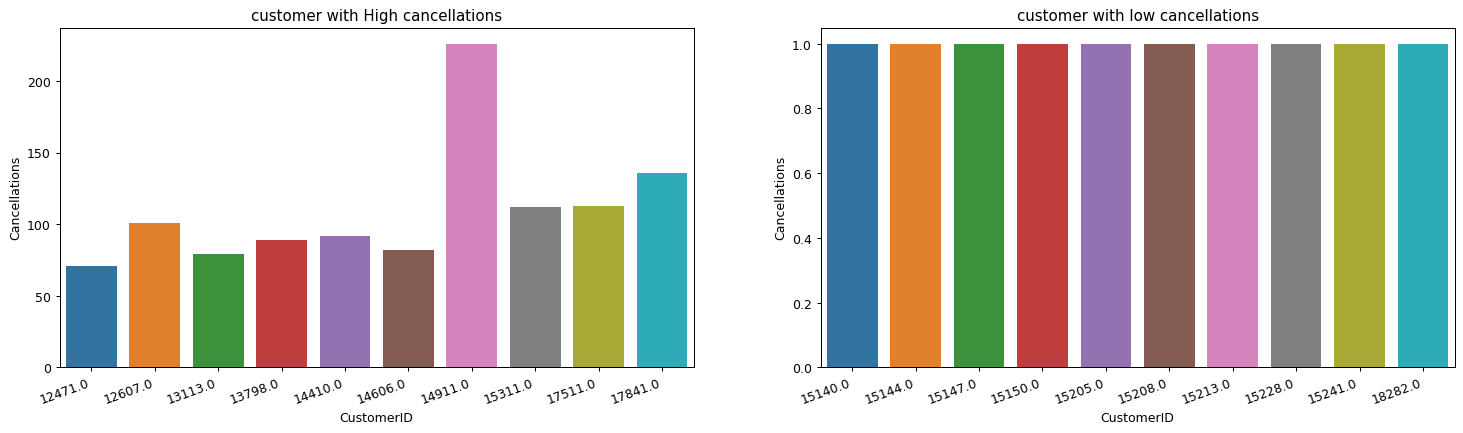

In [37]:
# Visualizing top and bottom 10 customers based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(10),x="CustomerID",y="Cancellations")
plt.show()

In [38]:
# Checking the number of cancellations countrywise. 
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

,Country,Cancellations
27,United Kingdom,7501
11,Germany,453
7,EIRE,247
10,France,148
26,USA,112


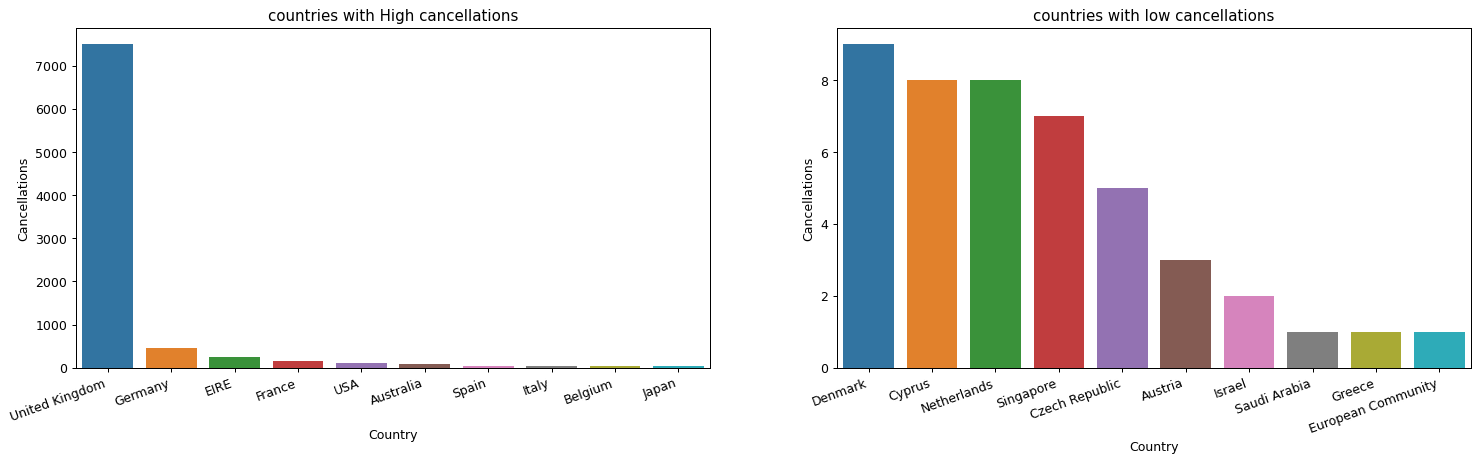

In [39]:
# Visualizing top and bottom 10 countries based on cancellations 
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(10),x="Country",y="Cancellations")
plt.show()

# **RFM Modelling**

*   Since most of the customers are wholesalers we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.
*   We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT They sell it to individual customers(B2C) or sell all products to another stores (B2B).
*    Due to all these reasons we need to cluster customers according to there activities i.e                         
  1 R-Recency               
  2 F-Frequency            
  3 M-Monetary





In [40]:
# Adding 1 date to the last invoice date to set as latest date for reference
LatestDate = dt['InvoiceDate'].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = dt.groupby('CustomerID').agg({'InvoiceDate' : lambda x : (LatestDate - x.max()).days,
                                    'InvoiceNo' : lambda x : len(x), 'TotalAmount' : lambda x : x.sum()})
# Remaining the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Check top 5 rows
rfm.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


Interpretation:          
  1 Recency: How recent a customer made a purchase.            
  2 Frequency: How often a customer makes a purchase.       
  3 Monetary: How much money a customer spends.

In [41]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the rfm group for each customer by combining the factor R, F and M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the rfm group for each customer by adding the factor R, F and M
rfm['RFM_score'] = rfm['R'] + rfm['F'] + rfm['M']

Interpretation :                          
  1 If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.           
  2 If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.            
  3 If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.              
  4 Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [42]:
# Handling the zeros in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying log transformation on columns for smoothening the distribution
rfm['Recency_log'] = rfm['Recency'].apply(np.log)
rfm['Frequency_log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_log'] = rfm['Monetary'].apply(np.log)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,5.786897,0.000000,11.253942
12347.0,2,182,4310.00,4,4,4,444,12,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,2,2,4,224,8,4.317488,3.433987,7.494007
12349.0,19,73,1757.55,3,3,4,334,10,2.944439,4.290459,7.471676
12350.0,310,17,334.40,1,1,2,112,4,5.736572,2.833213,5.812338


In [43]:
# check discriptive stats
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,Recency_log,Frequency_log,Monetary_log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.518322,90.512100,2048.216154,2.514174,2.487670,2.499885,278.793962,7.501729,3.767274,3.670868,6.584187
std,100.009747,225.515328,8984.248299,1.126392,1.122724,1.118266,118.825268,2.816451,1.432382,1.321685,1.265573
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,0.000000
25%,18.000000,17.000000,306.455000,2.000000,1.000000,1.500000,211.000000,5.000000,2.890372,2.833213,5.725071
50%,51.000000,41.000000,668.560000,3.000000,2.000000,2.000000,311.000000,7.000000,3.931826,3.713572,6.505126
75%,142.000000,98.000000,1660.315000,4.000000,3.000000,3.500000,411.000000,10.000000,4.955827,4.584967,7.414763
max,374.000000,7676.000000,280206.020000,4.000000,4.000000,4.000000,444.000000,12.000000,5.924256,8.945854,12.543280


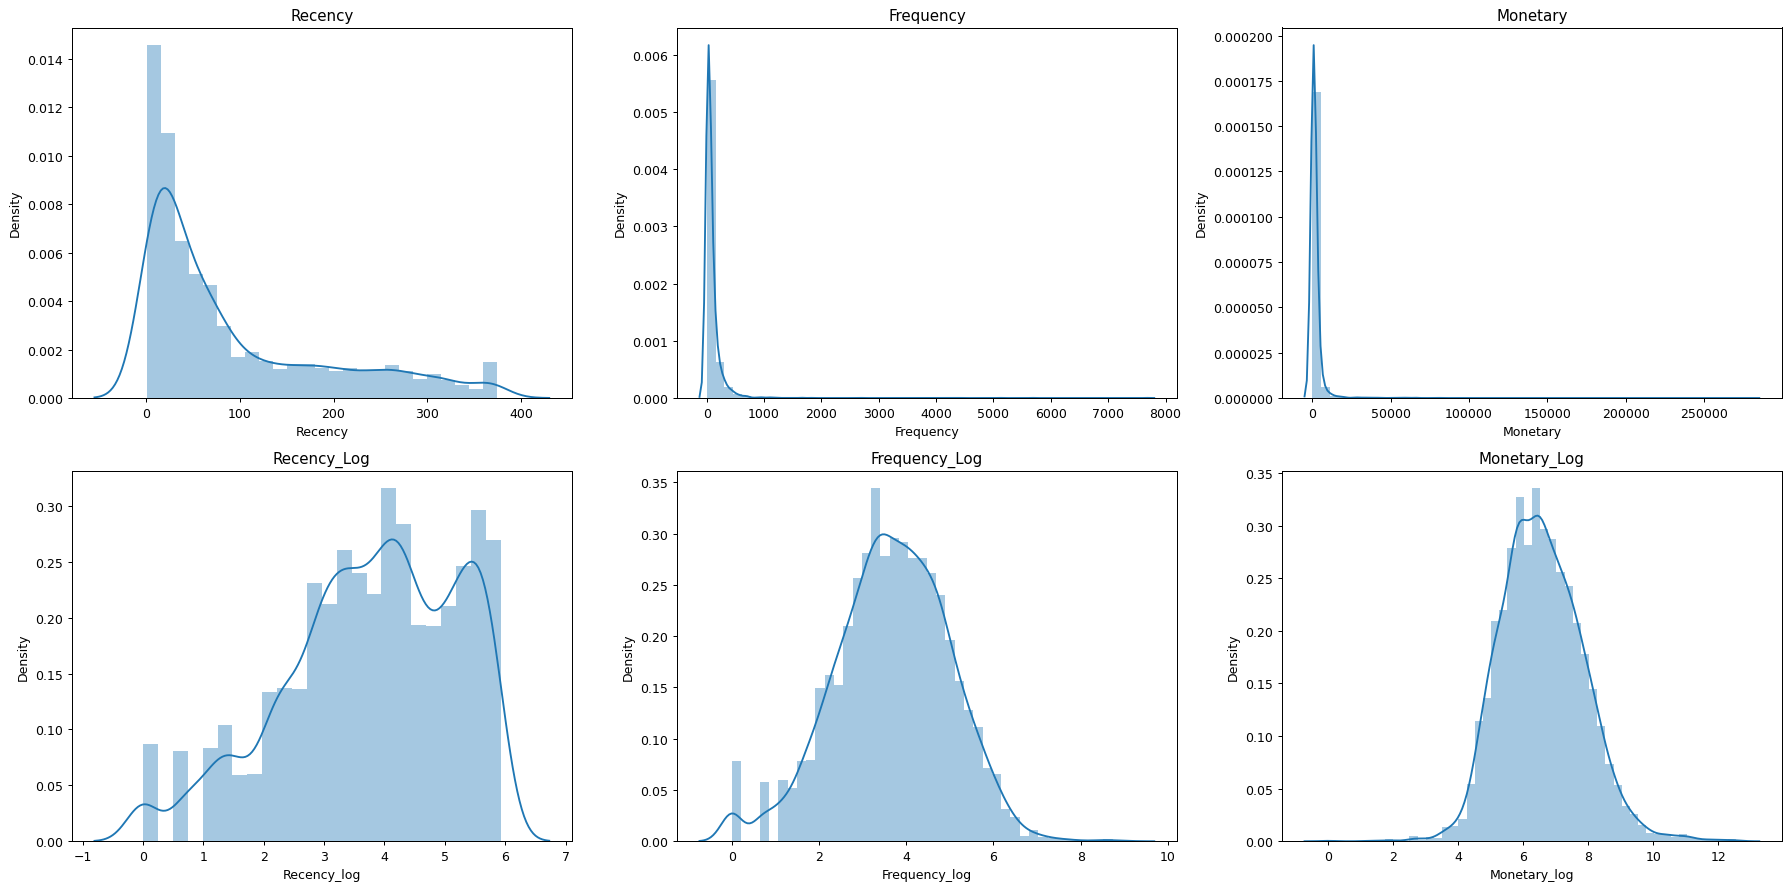

In [44]:
# Visualizing the distribution before and after log transformation
column = ['Recency','Frequency','Monetary', 'Recency_log','Frequency_log','Monetary_log']
plt.figure(figsize=(20,10),dpi=90)
for n,col in enumerate(column):
  plt.subplot(2,3,n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

Observations                         
  1 Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.               
  2 It will be more suitable to use the transformed features for better visualisation of clusters.

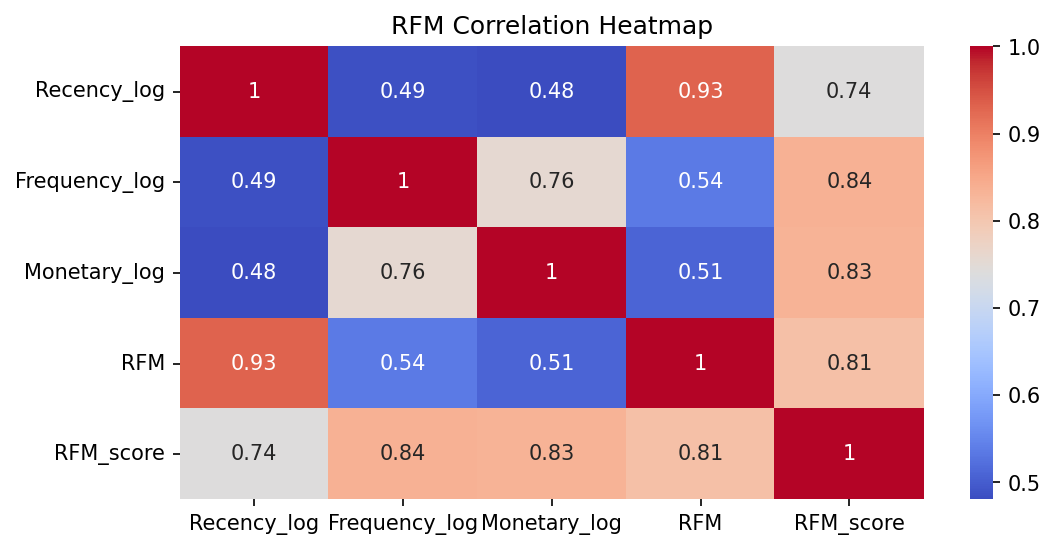

In [45]:
# Visualizing the correlations among features
column = ['Recency_log','Frequency_log','Monetary_log','RFM','RFM_score']

plt.figure(figsize=(8,4), dpi=150)
sns.heatmap(abs(rfm[column].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **Clustering**

**Prerequisites**

In [46]:
# For plots and visualizations
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# setting default parameters for the plots
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams["figure.dpi"] = 150

In [47]:
# Defining x variables
X = rfm[['Recency_log','Frequency_log','Monetary_log']]
X = StandardScaler().fit_transform(X)